In [3]:
import pandas as pd 
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

raw_df = pd.read_csv('enriched_employee_dataset.csv')

print(raw_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee ID              22750 non-null  object 
 1   Date of Joining          22750 non-null  object 
 2   Gender                   22750 non-null  object 
 3   Company Type             22750 non-null  object 
 4   WFH Setup Available      22750 non-null  object 
 5   Designation              22750 non-null  int64  
 6   Resource Allocation      21369 non-null  float64
 7   Mental Fatigue Score     20633 non-null  float64
 8   Burn Rate                21626 non-null  float64
 9   Years in Company         22750 non-null  int64  
 10  Work Hours per Week      22750 non-null  int64  
 11  Sleep Hours              22750 non-null  float64
 12  Work-Life Balance Score  22750 non-null  int64  
 13  Manager Support Score    22750 non-null  int64  
 14  Deadline Pressure Scor

In [4]:
print(raw_df.head())

                Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      Service   
1      fffe3700360033003500      2008-11-30    Male      Service   
2  fffe31003300320037003900      2008-03-10  Female      Product   
3  fffe32003400380032003900      2008-11-03    Male      Service   
4  fffe31003900340031003600      2008-07-24  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No            2                  3.0                   3.8   
1                 Yes            1                  2.0                   5.0   
2                 Yes            2                  NaN                   5.8   
3                 Yes            1                  1.0                   2.6   
4                  No            3                  7.0                   6.9   

   Burn Rate  Years in Company  Work Hours per Week  Sleep Hours  \
0       0.16                16      

In [5]:
print(raw_df.describe())

        Designation  Resource Allocation  Mental Fatigue Score     Burn Rate  \
count  22750.000000         21369.000000          20633.000000  21626.000000   
mean       2.178725             4.481398              5.728188      0.452005   
std        1.135145             2.047211              1.920839      0.198226   
min        0.000000             1.000000              0.000000      0.000000   
25%        1.000000             3.000000              4.600000      0.310000   
50%        2.000000             4.000000              5.900000      0.450000   
75%        3.000000             6.000000              7.100000      0.590000   
max        5.000000            10.000000             10.000000      1.000000   

       Years in Company  Work Hours per Week   Sleep Hours  \
count      22750.000000         22750.000000  22750.000000   
mean          16.015956            47.364747      6.153965   
std            0.125308             7.651106      0.892709   
min           16.000000        

In [6]:
# How many Nulls?

print(raw_df.isna().sum())

Employee ID                   0
Date of Joining               0
Gender                        0
Company Type                  0
WFH Setup Available           0
Designation                   0
Resource Allocation        1381
Mental Fatigue Score       2117
Burn Rate                  1124
Years in Company              0
Work Hours per Week           0
Sleep Hours                   0
Work-Life Balance Score       0
Manager Support Score         0
Deadline Pressure Score       0
Team Size                     0
Recognition Frequency         0
dtype: int64


<Axes: >

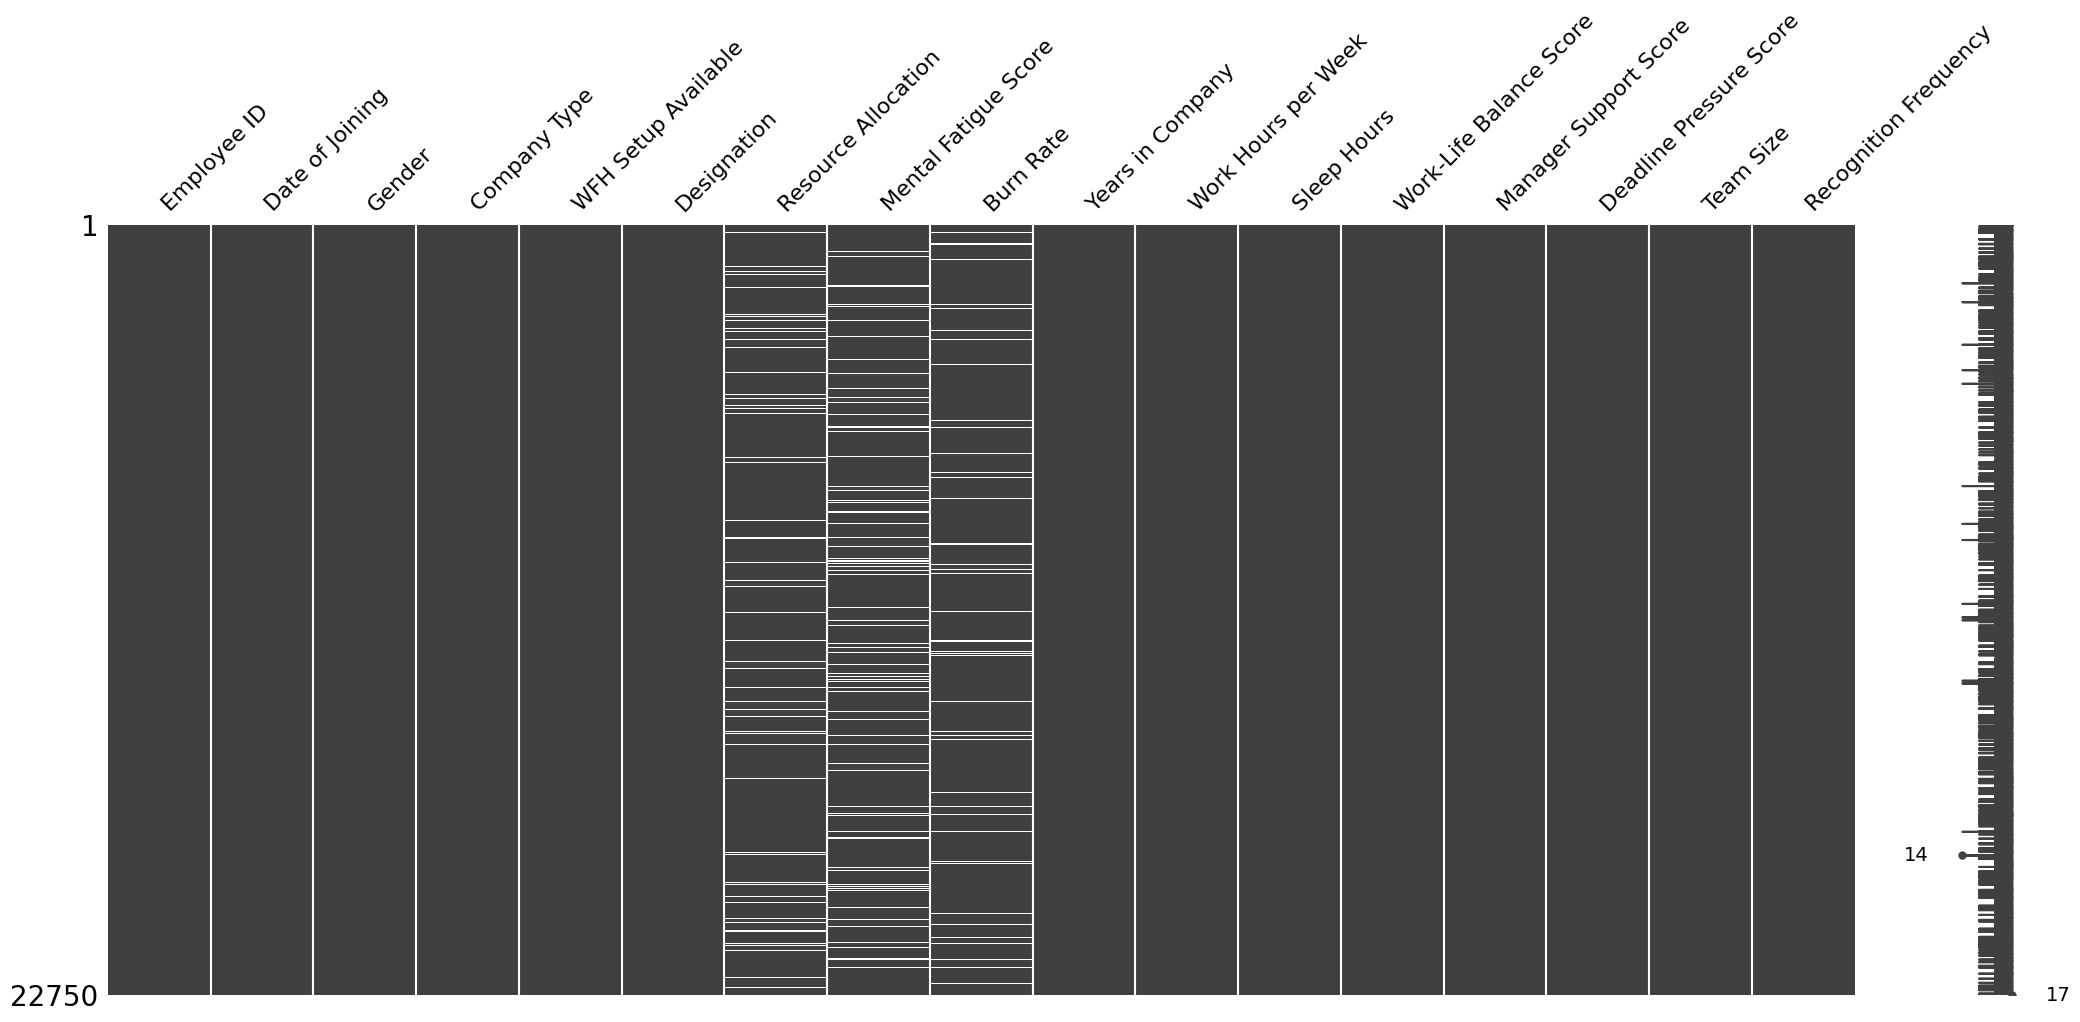

In [7]:
#Visualize the nulls for randomness
msno.matrix(raw_df)

In [8]:
# Drop rows where Burn Rate is null 
raw_df = raw_df.dropna(subset=["Burn Rate"])


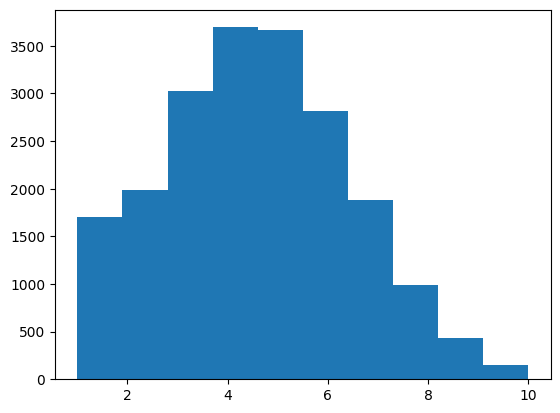

In [9]:
#Examine Distribution before imputation

plt.hist(raw_df["Resource Allocation"])
plt.show()

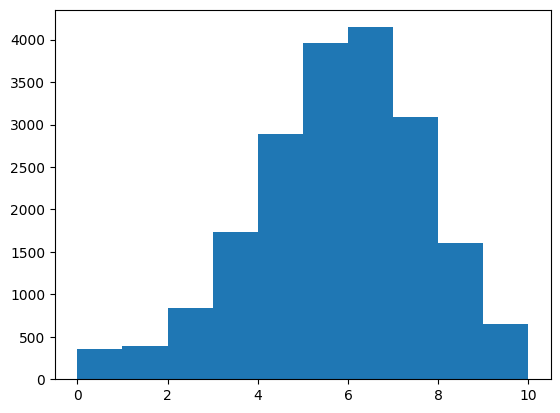

In [10]:
plt.hist(raw_df["Mental Fatigue Score"])
plt.show()

In [11]:
# impute median for missing data in Resource Allocation and Mental Fatigue Score 

for c in ["Resource Allocation", "Mental Fatigue Score"]:
    raw_df[c] = raw_df[c].fillna(raw_df[c].median())


In [12]:
# Verify Nulls are filled
print(raw_df.isna().sum())

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation        0
Mental Fatigue Score       0
Burn Rate                  0
Years in Company           0
Work Hours per Week        0
Sleep Hours                0
Work-Life Balance Score    0
Manager Support Score      0
Deadline Pressure Score    0
Team Size                  0
Recognition Frequency      0
dtype: int64


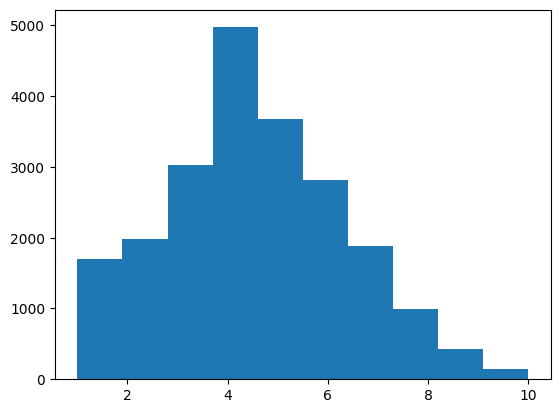

In [13]:
# Distribution after imputation 

plt.hist(raw_df["Resource Allocation"])
plt.show()

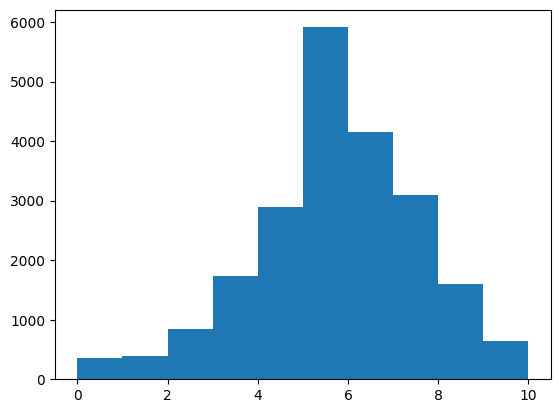

In [14]:
plt.hist(raw_df["Mental Fatigue Score"])
plt.show()

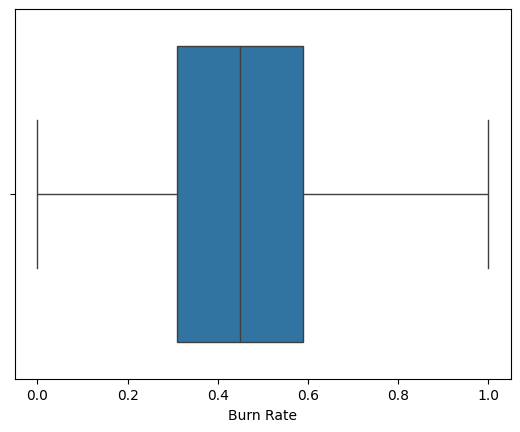

In [15]:
# Box Plot for Burn Rate - Univariate 

burn_box = sns.boxplot(data=raw_df, x="Burn Rate")
plt.show(burn_box)

In [16]:
# Count Records of Burn Rate >= .59
burn_cnt = raw_df[raw_df["Burn Rate"] >= 0.59]
burn_cnt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5480 entries, 6 to 22749
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee ID              5480 non-null   object 
 1   Date of Joining          5480 non-null   object 
 2   Gender                   5480 non-null   object 
 3   Company Type             5480 non-null   object 
 4   WFH Setup Available      5480 non-null   object 
 5   Designation              5480 non-null   int64  
 6   Resource Allocation      5480 non-null   float64
 7   Mental Fatigue Score     5480 non-null   float64
 8   Burn Rate                5480 non-null   float64
 9   Years in Company         5480 non-null   int64  
 10  Work Hours per Week      5480 non-null   int64  
 11  Sleep Hours              5480 non-null   float64
 12  Work-Life Balance Score  5480 non-null   int64  
 13  Manager Support Score    5480 non-null   int64  
 14  Deadline Pressure Score  548

In [17]:
# Create new column for Burnout_Risk - 1/0 

raw_df["burnout_risk"] = (raw_df["Burn Rate"] >= 0.59).astype(int)

In [18]:
# Count Burnout Risks
raw_df["burnout_risk"].value_counts()

burnout_risk
0    16146
1     5480
Name: count, dtype: int64

In [19]:
# Distinct Categories for Gender and Company Type

print(raw_df["Gender"].unique())
print(raw_df["Company Type"].unique())

['Female' 'Male']
['Service' 'Product']


In [20]:
# Transform other binary variables 

raw_df["WFH Setup Available"] = raw_df["WFH Setup Available"].map({"Yes": 1, "No": 0})
raw_df["Gender"] = raw_df["Gender"].map({"Male": 1, "Female": 0})
raw_df["Company Type"] = raw_df["Company Type"].map({"Product": 1, "Service": 0})

print(raw_df.head())

                Employee ID Date of Joining  Gender  Company Type  \
0  fffe32003000360033003200      2008-09-30       0             0   
1      fffe3700360033003500      2008-11-30       1             0   
2  fffe31003300320037003900      2008-03-10       0             1   
3  fffe32003400380032003900      2008-11-03       1             0   
4  fffe31003900340031003600      2008-07-24       0             0   

   WFH Setup Available  Designation  Resource Allocation  \
0                    0            2                  3.0   
1                    1            1                  2.0   
2                    1            2                  4.0   
3                    1            1                  1.0   
4                    0            3                  7.0   

   Mental Fatigue Score  Burn Rate  Years in Company  Work Hours per Week  \
0                   3.8       0.16                16                   35   
1                   5.0       0.36                16                  

In [21]:
# Create X and Y Variables 

X = raw_df.drop(columns=["burnout_risk", "Burn Rate", "Employee ID", "Date of Joining"], errors="ignore")
y = raw_df["burnout_risk"]


In [22]:
# Explore with Shapiro-Wilk Test on continuous X variables to measure their p-values

from scipy.stats import shapiro

continuous_cols = [c for c in X.columns if X[c].nunique() > 2 and X[c].dtype != "object"]

shapiro_results = {
    c: shapiro(X[c].dropna()).pvalue
    for c in continuous_cols
}

shapiro_results

c:\Users\Nichole\anaconda3\envs\tf310\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21626.
  res = hypotest_fun_out(*samples, **kwds)


{'Designation': np.float64(7.819070946069225e-71),
 'Resource Allocation': np.float64(5.115297375426671e-57),
 'Mental Fatigue Score': np.float64(1.3668537786634789e-45),
 'Work Hours per Week': np.float64(2.155376319669442e-72),
 'Sleep Hours': np.float64(1.0620233754968303e-49),
 'Work-Life Balance Score': np.float64(4.818529853299056e-87),
 'Manager Support Score': np.float64(2.7112275004541345e-78),
 'Deadline Pressure Score': np.float64(3.335517965953423e-87),
 'Team Size': np.float64(2.9242895497665966e-65),
 'Recognition Frequency': np.float64(6.697226159708007e-89)}

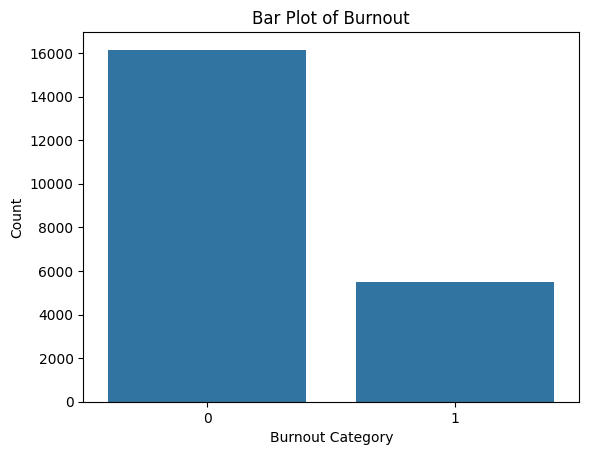

In [23]:
sns.barplot(
    x=raw_df["burnout_risk"].value_counts().index, 
    y=raw_df['burnout_risk'].value_counts() )

# Add titles and labels
plt.title('Bar Plot of Burnout')
plt.xlabel('Burnout Category')
plt.ylabel('Count')

# Show the plot
plt.show()

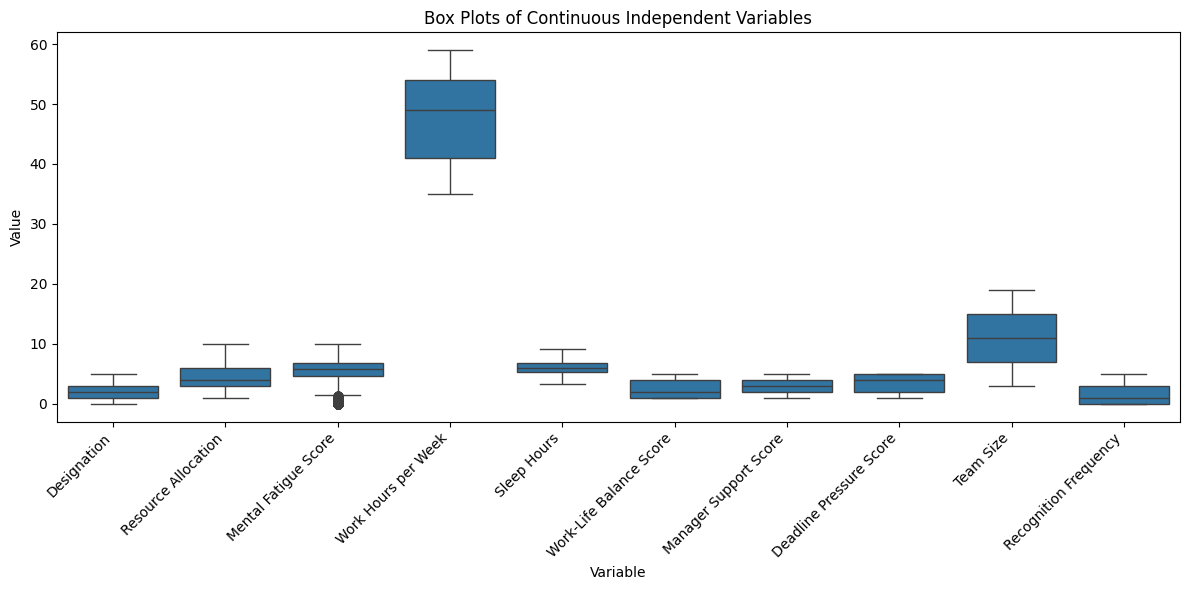

In [24]:
# Plot box plots for each numeric independent variables column

# Select only continuous variables
cont_cols = [c for c in X.columns if X[c].nunique() > 2]

# Reshape data for faceting
long_df = X[cont_cols].melt(var_name="Variable", value_name="Value")

plt.figure(figsize=(12, 6))
sns.boxplot(data=long_df, x="Variable", y="Value")
plt.xticks(rotation=45, ha="right")
plt.title("Box Plots of Continuous Independent Variables")
plt.tight_layout()
plt.show()


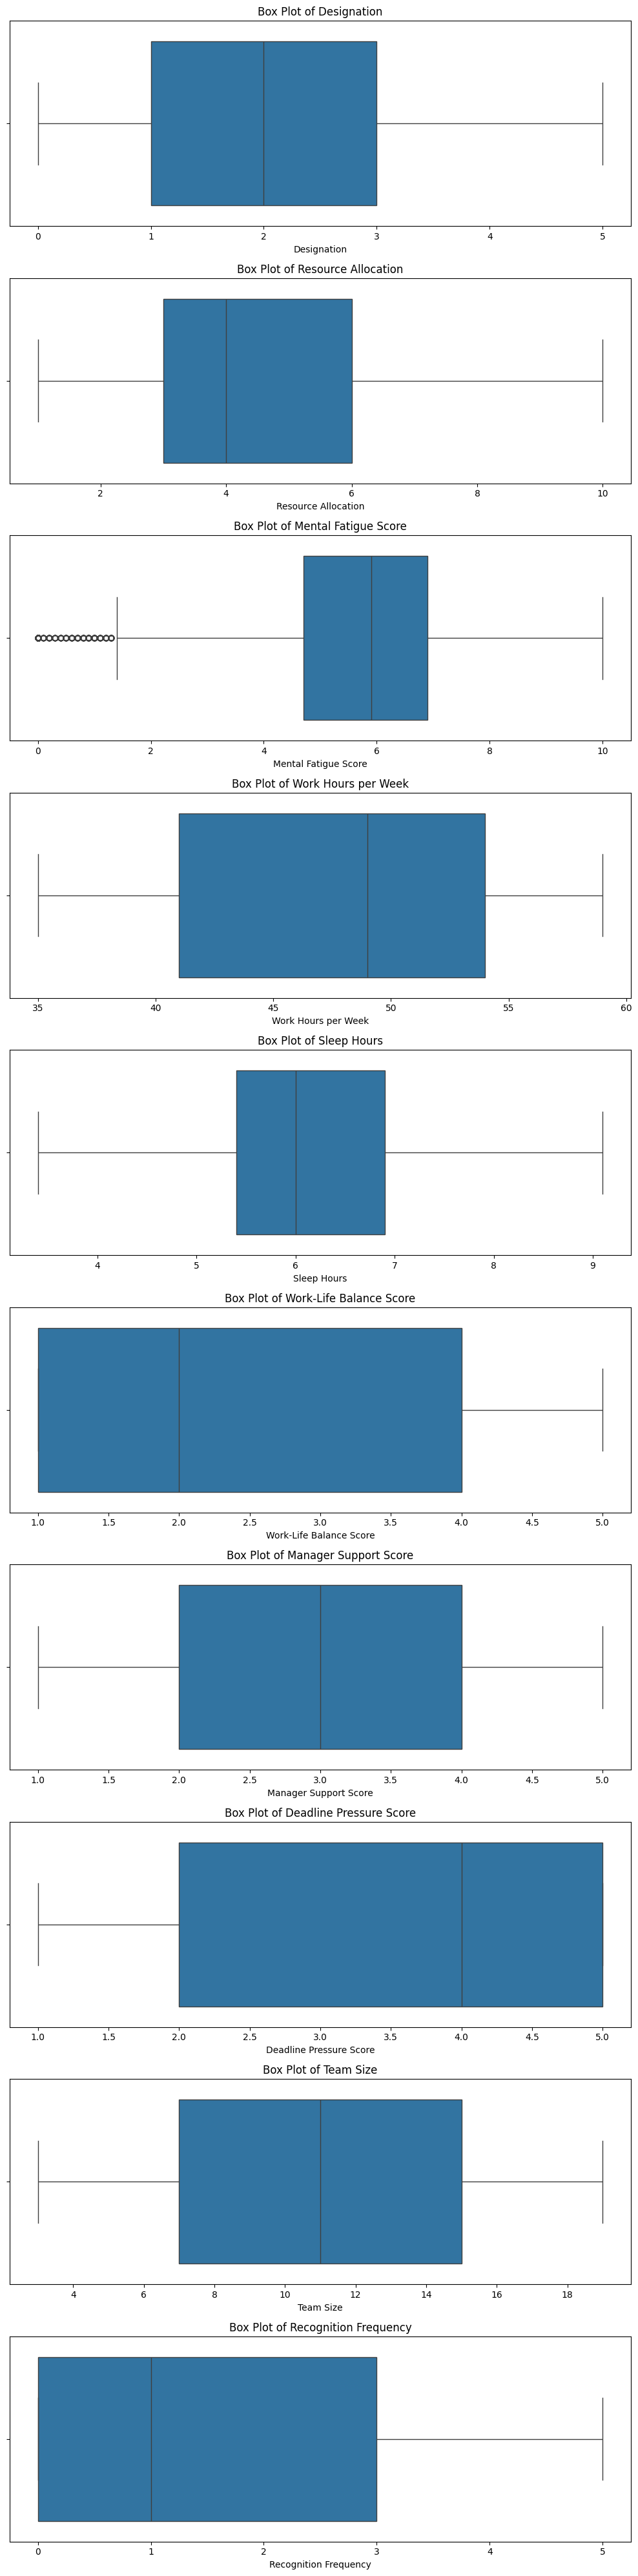

In [25]:
# Select continuous predictors only
cont_cols = [c for c in X.columns if X[c].nunique() > 2]

# Create a vertical layout
fig, axes = plt.subplots(len(cont_cols), 1, figsize=(10, 4 * len(cont_cols)))

for ax, col in zip(axes, cont_cols):
    sns.boxplot(x=X[col], ax=ax)
    ax.set_title(f"Box Plot of {col}")
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

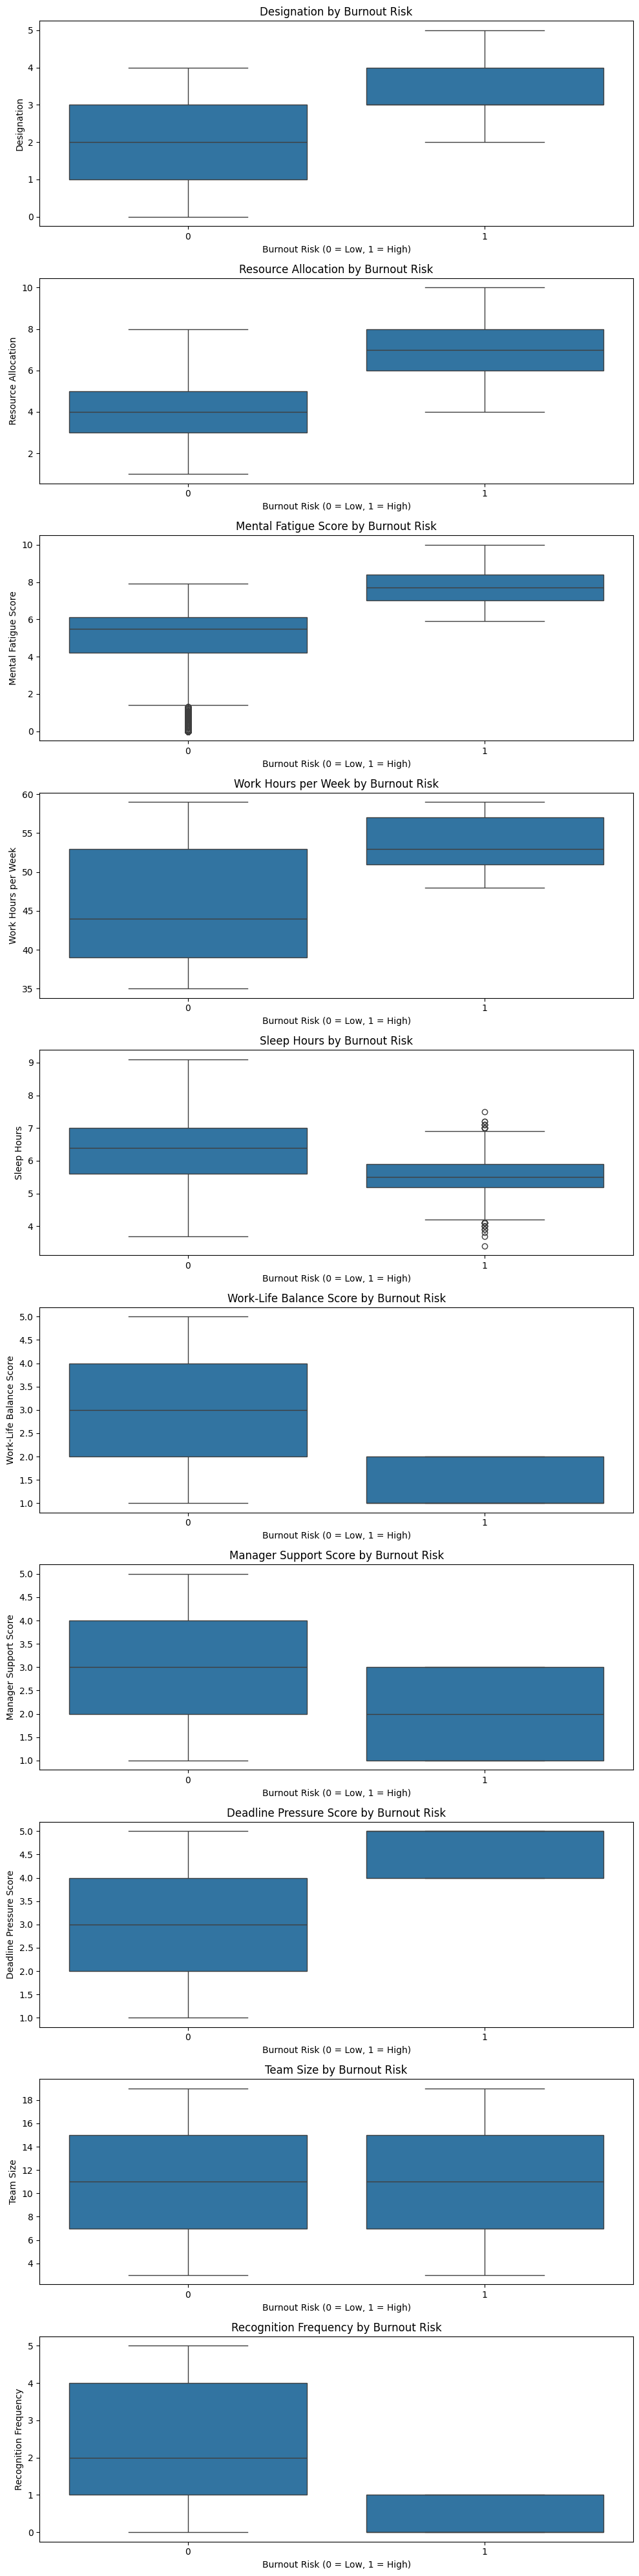

In [26]:
# Select continuous predictors only
cont_cols = [c for c in X.columns if X[c].nunique() > 2]

# Create vertically stacked box plots split by burnout_risk
fig, axes = plt.subplots(len(cont_cols), 1, figsize=(10, 4 * len(cont_cols)))

for ax, col in zip(axes, cont_cols):
    sns.boxplot(data=raw_df, x="burnout_risk", y=col, ax=ax)
    ax.set_title(f"{col} by Burnout Risk")
    ax.set_xlabel("Burnout Risk (0 = Low, 1 = High)")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

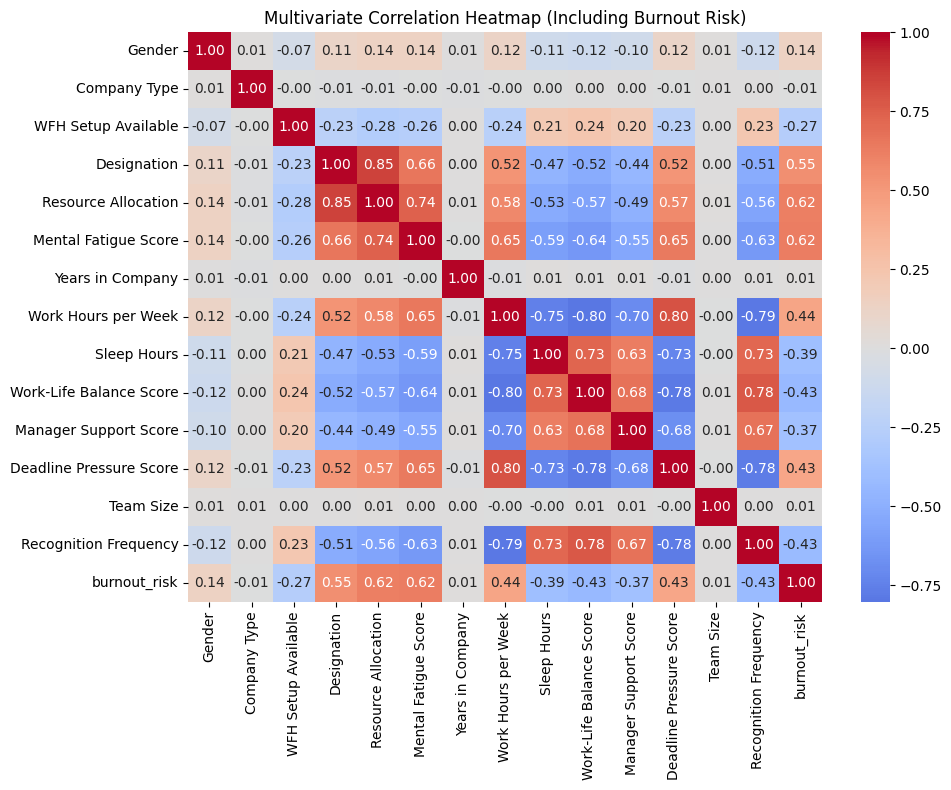

In [27]:
# Select numeric variables for multivariate analysis looking for correlation 

num_cols = X.select_dtypes(include="number").columns.tolist() + ["burnout_risk"]

corr = raw_df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Multivariate Correlation Heatmap (Including Burnout Risk)")
plt.tight_layout()
plt.show()

In [28]:
# Start Logistic Regression - Import Libraries and packages for LR

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

RANDOM_STATE = 42 # for reproducability
ALPHA = 0.05  # significance p-value threshold for backward elimination

In [29]:
# 80/20 split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y)


print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 17300
Test set size: 4326


In [30]:
#Coefficients before step wise

X_full = sm.add_constant(X)
full_model = sm.Logit(y, X_full).fit(disp=0)

coef_before = (
    full_model.params
    .drop("const")
    .rename("Before Stepwise")
)

coef_before

Gender                     0.165922
Company Type              -0.035506
WFH Setup Available       -0.437487
Designation                0.460657
Resource Allocation        0.489642
Mental Fatigue Score       1.770486
Years in Company           0.220378
Work Hours per Week        0.015572
Sleep Hours               -0.023889
Work-Life Balance Score   -0.158307
Manager Support Score     -0.059844
Deadline Pressure Score    0.116126
Team Size                  0.004992
Recognition Frequency     -0.209766
Name: Before Stepwise, dtype: float64

In [31]:
#Backward stepwise elimination 

X = X_train.copy()
y = y_train.copy()

# Add intercept
X = sm.add_constant(X)

# Fit initial full model (THIS WAS MISSING)
result = sm.Logit(y, X).fit(disp=0)

ALPHA = 0.05

while True:
    p_values = result.pvalues.drop("const", errors="ignore")
    max_p_value = p_values.max()

    if max_p_value > ALPHA:
        feature_to_remove = p_values.idxmax()
        print(f"Removing '{feature_to_remove}' with p-value {max_p_value:.4f}")
        X = X.drop(columns=[feature_to_remove])
        result = sm.Logit(y, X).fit(disp=0)
    else:
        break

print("\nFinal Model Summary:")
print(result.summary())


Removing 'Company Type' with p-value 0.9648
Removing 'Team Size' with p-value 0.8900
Removing 'Years in Company' with p-value 0.7116
Removing 'Sleep Hours' with p-value 0.2429
Removing 'Deadline Pressure Score' with p-value 0.0877
Removing 'Manager Support Score' with p-value 0.0628

Final Model Summary:
                           Logit Regression Results                           
Dep. Variable:           burnout_risk   No. Observations:                17300
Model:                          Logit   Df Residuals:                    17291
Method:                           MLE   Df Model:                            8
Date:                Sat, 10 Jan 2026   Pseudo R-squ.:                  0.6255
Time:                        16:42:43   Log-Likelihood:                -3667.1
converged:                       True   LL-Null:                       -9792.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      

In [32]:
#Logistic Regression with new variables

# Variables identified in stepwise elimination
selected_vars = [
    "Gender",
    "WFH Setup Available",
    "Designation",
    "Resource Allocation",
    "Mental Fatigue Score",
    "Work Hours per Week",
    "Work-Life Balance Score",
    "Recognition Frequency"]

# Pull identified variables from X
X_final = X[selected_vars]
y_final = y

#Split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.20, stratify=y_final, random_state=RANDOM_STATE)


In [33]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

logit_final = LogisticRegression(
    max_iter=2000,
    class_weight="balanced",
    random_state=RANDOM_STATE )

logit_final.fit(X_train_s, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [34]:
y_pred = logit_final.predict(X_test_s)

confusion_matrix(y_test, y_pred), {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, zero_division=0),
    "recall": recall_score(y_test, y_pred, zero_division=0)}


(array([[2284,  299],
        [  59,  818]]),
 {'accuracy': 0.8965317919075144,
  'precision': 0.7323187108325873,
  'recall': 0.9327251995438997})

In [35]:

X_sm = sm.add_constant(X_train[selected_vars])
logit_sm = sm.Logit(y_train, X_sm).fit(disp=0)

logit_sm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           burnout_risk   No. Observations:                13840
Model:                          Logit   Df Residuals:                    13831
Method:                           MLE   Df Model:                            8
Date:                Sat, 10 Jan 2026   Pseudo R-squ.:                  0.6173
Time:                        16:42:44   Log-Likelihood:                -2997.9
converged:                       True   LL-Null:                       -7833.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -16.6900      0.597    -27.952      0.000     -17.860     -15.520
Gender                      0.1341      0.066      2.033      0.042       0.005       0.263
WFH Setup Available        -0.4932      0.069     -7.198      0.000      -0.627      -0.359
Designation                 0.4344      0.054      7.987      0.000       0.328       0.541
Resource Allocation         0.4890      0.035     13.937      0.000       0.420       0.558
Mental Fatigue Score        1.7259      0.045     38.339      0.000       1.638       1.814
Work Hours per Week         0.0213      0.009      2.423      0.015       0.004       0.039
Work-Life Balance Score    -0.2040      0.060     -3.420      0.001      -0.321      -0.087
Recognition Frequency      -0.2150      0.057     -3.781      0.000      -0.326      -0.104
===========================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [36]:

odds_ratios = np.exp(logit_sm.params).rename("odds_ratio")
odds_ratios.round(3)


const                      0.000
Gender                     1.143
WFH Setup Available        0.611
Designation                1.544
Resource Allocation        1.631
Mental Fatigue Score       5.618
Work Hours per Week        1.022
Work-Life Balance Score    0.815
Recognition Frequency      0.807
Name: odds_ratio, dtype: float64